In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [83]:
# ===================================
# Books Dataset - Initial Exploration
# ===================================

books = pd.read_csv('clean_books.csv')
print(books.head())

                                                name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     author  rating  year        genre  
0                  JJ Smith     4.7  2016  Non Fiction  
1              Stephen King     4.6  2011      Fiction  
2        Jordan B. Peterson     4.7  2018  Non Fiction  
3             George Orwell     4.7  2017      Fiction  
4  National Geographic Kids     4.8  2019    Childrens  


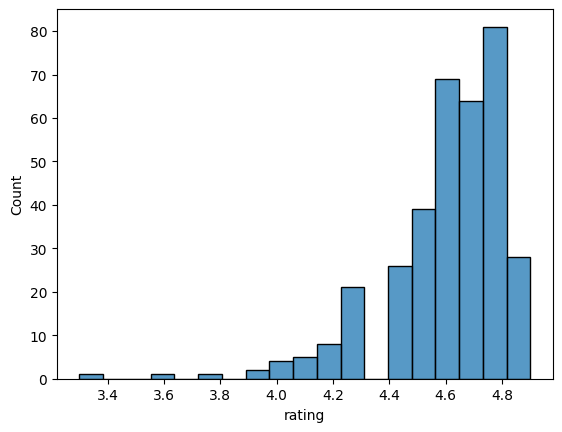

In [84]:
sns.histplot(data=books, x='rating')
plt.show()

In [85]:
books.value_counts("genre")
books['genre'].value_counts()
books.value_counts('genre')

genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64
genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64
genre
Non Fiction    179
Fiction        131
Childrens       40
Name: count, dtype: int64


In [ ]:
# ===================================
# Practice Task - Unemployment Histogram
# ===================================

unemployment = pd.read_csv('clean_unemployment.csv')

sns.histplot(data=unemployment, x='2021', binwidth=0.1)
plt.show()

In [86]:
# ===================================
# Books Dataset - Data Validation
# ===================================

books.info()
books.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    350 non-null    object 
 1   author  350 non-null    object 
 2   rating  350 non-null    float64
 3   year    350 non-null    int64  
 4   genre   350 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 13.8+ KB
None
name       object
author     object
rating    float64
year        int64
genre      object
dtype: object


In [87]:
books["genre"].isin(["Fiction", "Non Fiction"])
~books['genre'].isin(['Fiction','Non Fiction'])
books[books['genre'].isin(['Fiction', 'Non Fiction'])].head()

0       True
1       True
2       True
3       True
4      False
       ...  
345     True
346     True
347     True
348     True
349    False
Name: genre, Length: 350, dtype: bool
0      False
1      False
2      False
3      False
4       True
       ...  
345    False
346    False
347    False
348    False
349     True
Name: genre, Length: 350, dtype: bool
                                            name               author  rating  \
0                  10-Day Green Smoothie Cleanse             JJ Smith     4.7   
1                              11/22/63: A Novel         Stephen King     4.6   
2        12 Rules for Life: An Antidote to Chaos   Jordan B. Peterson     4.7   
3                         1984 (Signet Classics)        George Orwell     4.7   
5  A Dance with Dragons (A Song of Ice and Fire)  George R. R. Martin     4.4   

   year        genre  
0  2016  Non Fiction  
1  2011      Fiction  
2  2018  Non Fiction  
3  2017      Fiction  
5  2011      Fiction  


In [88]:
books.select_dtypes("number").head()

   rating  year
0     4.7  2016
1     4.6  2011
2     4.7  2018
3     4.7  2017
4     4.8  2019


2009


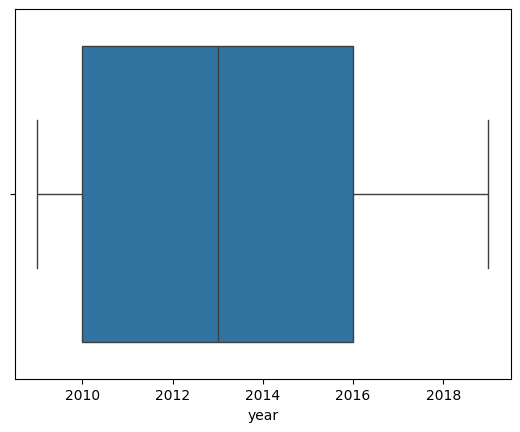

2019


In [89]:
books["year"].min()
sns.boxplot(data=books, x="year")
plt.show()
books["year"].max()

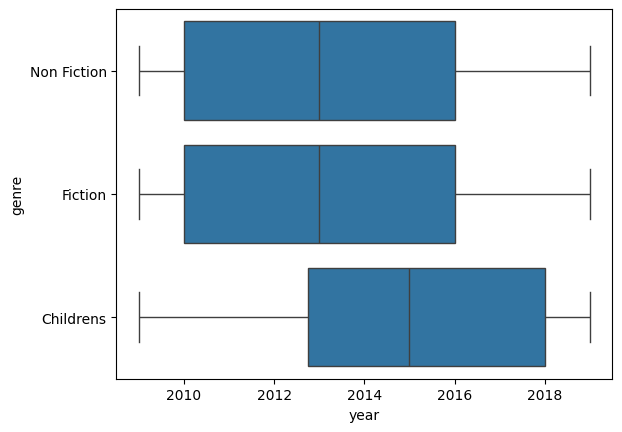

In [90]:
sns.boxplot(data=books, x="year", y="genre")
plt.show()

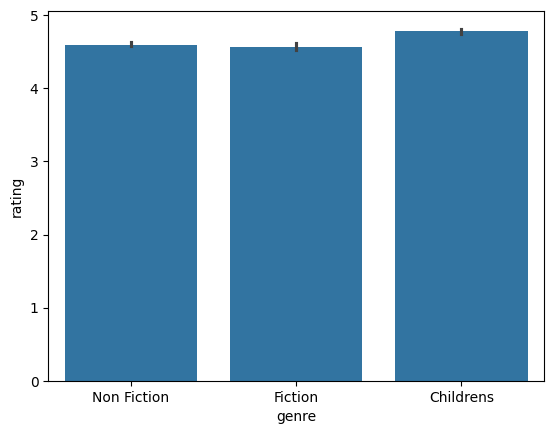

In [91]:
# ===================================
# Books Dataset - Aggregations & Visualization
# ===================================

books.groupby("genre").mean(numeric_only=True)

In [ ]:
books.select_dtypes(include=np.number).agg(['mean', 'std'])

In [ ]:
books.groupby('genre')[['rating', 'year']].mean()

In [ ]:
books.groupby('genre').mean(numeric_only=True)

In [ ]:
numeric_cols = list(books.select_dtypes(include=np.number).columns)
books[numeric_cols].agg(['std', 'mean'])

In [ ]:
books.agg({ "rating": ["mean", "std"], "year": ["median"] })

In [92]:
books.groupby("genre").agg(
    mean_rating=("rating", "mean"),
    std_rating=("rating", "std"),
    median_year=("year", "median")
)

,mean_rating,std_rating,median_year
genre,,,
Childrens,4.780000,0.122370,2015.0
Fiction,4.570229,0.281123,2013.0
Non Fiction,4.598324,0.179411,2013.0


In [99]:
sns.barplot(data=books, x="genre", y="rating")
plt.show()

               mean_year  median_rating  num_books
genre                                             
Childrens    2015.075000            4.8         40
Fiction      2013.022901            4.6        131
Non Fiction  2013.513966            4.6        179


In [ ]:
# ===================================
# Remaining Unemployment Practice Tasks
# ===================================

not_oceania = ~unemployment['continent'].isin(['Oceania'])
unemployment[not_oceania].head()

In [ ]:
unemployment['2021'].min(), unemployment['2021'].max()

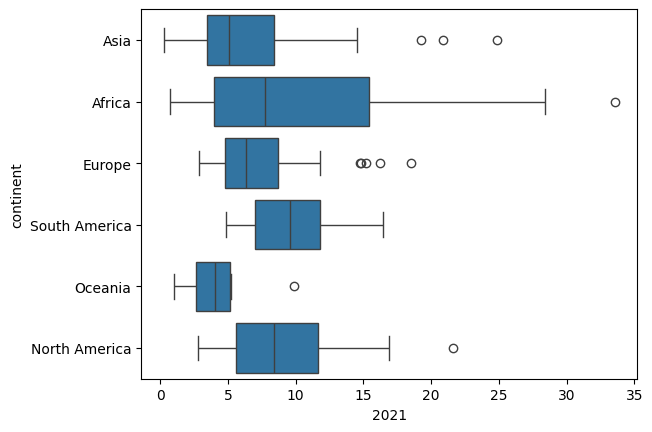

In [106]:
sns.boxplot(data=unemployment, x='2021', y='continent')
plt.show()

In [ ]:
year_stats = unemployment.select_dtypes('number').agg(['mean', 'std'])
year_stats

In [ ]:
continent_summary = unemployment.groupby("continent").agg(
    mean_rate_2021=('2021', 'mean'),
    std_rate_2021=('2021', 'std')
)
continent_summary

In [ ]:
sns.barplot(data=unemployment, x='continent', y='2021')
plt.show()

In [ ]:
# ===================================
# Planes Dataset Tasks
# ===================================

planes = pd.read_csv('airline_unclean.csv', index_col=0)

In [ ]:
planes.isna().sum()

In [ ]:
threshold = len(planes) * 0.05
cols_to_drop = planes.columns[planes.isna().sum() <= threshold]
planes.dropna(subset=cols_to_drop, inplace=True)

In [ ]:
short_flights = r'(?<![0-9])[0-4]h'
medium_flights = r'(?<![0-9])[5-9]h'
long_flights = r'1[0-6]h'

conditions = [
    planes["Duration"].str.contains(short_flights, regex=True),
    planes["Duration"].str.contains(medium_flights, regex=True),
    planes["Duration"].str.contains(long_flights, regex=True)
]
planes["Duration_Category"] = np.select(conditions, ["Short", "Medium", "Long"], default="Extreme duration")

In [ ]:
sns.countplot(data=planes, x="Duration_Category")
plt.show()

In [ ]:
planes['hours'] = planes['Duration'].str.extract(r'(\d+)h').fillna(0).astype(int)
planes['minutes'] = planes['Duration'].str.extract(r'(\d+)m').fillna(0).astype(int)
planes['Duration_hours'] = planes['hours'] + planes['minutes'] / 60.0
planes.drop(['hours', 'minutes'], axis=1, inplace=True)

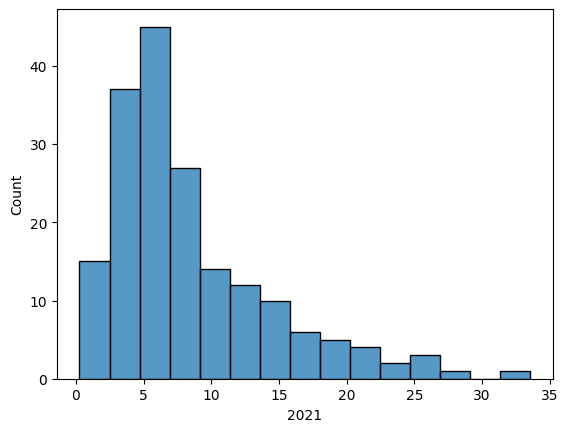

In [108]:
sns.histplot(data=planes, x='Duration_hours')
plt.show()

In [ ]:
planes['airline_price_std'] = planes.groupby('Airline')['Price'].transform('std')
planes['airline_medianduration'] = planes.groupby('Airline')['Duration_hours'].transform('median')
planes['price_destination_mean'] = planes.groupby('Destination')['Price'].transform('mean')

planes[['Airline', 'airline_price_std', 'airline_medianduration', 
        'Destination', 'price_destination_mean']].head()

In [109]:
p75 = planes["Price"].quantile(0.75)
p25 = planes["Price"].quantile(0.25)
iqr = p75 - p25
upper = p75 + 1.5 * iqr
lower = p25 - 1.5 * iqr

planes = planes[(planes["Price"] >= lower) & (planes["Price"] <= upper)]

After IQR outlier removal: 10365 rows
